In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re 
import string
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS
import datetime

# RQ1 Dataset

In [2]:
rq1 = pd.read_csv('rq1_dataset.csv')
rq1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 816 entries, 0 to 815
Data columns (total 27 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   App                            816 non-null    object 
 1   Category                       816 non-null    object 
 2   Rating                         816 non-null    float64
 3   Reviews                        816 non-null    int64  
 4   Size                           816 non-null    float64
 5   Installs                       816 non-null    int64  
 6   Type                           816 non-null    object 
 7   Price                          816 non-null    float64
 8   Content Rating                 816 non-null    object 
 9   Genres                         816 non-null    object 
 10  Last Updated                   816 non-null    object 
 11  Current Ver                    816 non-null    object 
 12  Android Ver                    816 non-null    obj

In [3]:
rq1.head()

App            Category  \
0                             10 Best Foods for You  HEALTH_AND_FITNESS   
1                                              11st            SHOPPING   
2                        1800 Contacts - Lens Store             MEDICAL   
3                   1LINE – One Line with One Touch                GAME   
4  2018Emoji Keyboard 😂 Emoticons Lite -sticker&gif     PERSONALIZATION   

   Rating  Reviews          Size  Installs  Type  Price Content Rating  \
0     4.0     2490  3.800000e+06    500000  Free    0.0   Everyone 10+   
1     3.8    48732  2.000000e+07  10000000  Free    0.0       Everyone   
2     4.7    23160  2.600000e+07   1000000  Free    0.0       Everyone   
3     4.6   214878  1.000000e+07  10000000  Free    0.0       Everyone   
4     4.2   115773  2.545835e+07  10000000  Free    0.0       Everyone   

             Genres  ... num_pos_comment num_neg_comment num_words_in_name  \
0  Health & Fitness  ...             144               6                 5   
1          Shopping  ...              15               4                 1   
2           Medical  ...              54               2                 5   
3             Board  ...              16               7                 7   
4   Personalization  ...              20               1                 6   

   num_chars_in_name  number_in_name  punctuation_in_name  num_genre  \
0                 21            True                False          1   
1                  4            True                False          1   
2                 26            True                 True          1   
3                 31            True                False          1   
4                 48            True                 True          1   

   install_category  score  popular  
0                 1    5.0        0  
1                 4    7.8        1  
2                 2    6.7        0  
3                 4    8.6        1  
4                 4    8.2        1  

[5 rows x 27 columns]

In [4]:
pd.set_option('display.max_rows', None)
rq1.describe(include='all').T.round(2)

count unique                      top freq  \
App                             816    816  Golfshot Plus: Golf GPS    1   
Category                        816     33                     GAME   93   
Rating                          816    NaN                      NaN  NaN   
Reviews                         816    NaN                      NaN  NaN   
Size                            816    NaN                      NaN  NaN   
Installs                        816    NaN                      NaN  NaN   
Type                            816      2                     Free  807   
Price                           816    NaN                      NaN  NaN   
Content Rating                  816      5                 Everyone  652   
Genres                          816     67                    Tools   47   
Last Updated                    816    247               2018-07-31   46   
Current Ver                     816    498       Varies with device  209   
Android Ver                     816     20       Varies with device  195   
num_comment_available           816    NaN                      NaN  NaN   
num_days_before_latest_update   816    NaN                      NaN  NaN   
genre_saturation                816    NaN                      NaN  NaN   
category_saturation             816    NaN                      NaN  NaN   
num_pos_comment                 816    NaN                      NaN  NaN   
num_neg_comment                 816    NaN                      NaN  NaN   
num_words_in_name               816    NaN                      NaN  NaN   
num_chars_in_name               816    NaN                      NaN  NaN   
number_in_name                  816      2                    False  744   
punctuation_in_name             816      2                    False  451   
num_genre                       816    NaN                      NaN  NaN   
install_category                816    NaN                      NaN  NaN   
score                           816    NaN                      NaN  NaN   
popular                         816    NaN                      NaN  NaN   

                                      mean          std   min        25%  \
App                                    NaN          NaN   NaN        NaN   
Category                               NaN          NaN   NaN        NaN   
Rating                              4.2826     0.313643   2.6        4.1   
Reviews                             711392  3.64051e+06   114    7777.75   
Size                           2.54583e+07  2.01656e+07  8500  1.075e+07   
Installs                       2.67095e+07  1.09935e+08  1000      1e+06   
Type                                   NaN          NaN   NaN        NaN   
Price                            0.0997672      1.27818     0          0   
Content Rating                         NaN          NaN   NaN        NaN   
Genres                                 NaN          NaN   NaN        NaN   
Last Updated                           NaN          NaN   NaN        NaN   
Current Ver                            NaN          NaN   NaN        NaN   
Android Ver                            NaN          NaN   NaN        NaN   
num_comment_available              44.0306      37.8788     1         28   
num_days_before_latest_update      142.876      309.599     0          7   
genre_saturation                   9.90809      6.25767     1          5   
category_saturation                9.45343      6.46351     1          4   
num_pos_comment                    17.0417      15.1597     0          7   
num_neg_comment                    3.59191      4.89611     0          0   
num_words_in_name                  4.03922       2.1263     1          2   
num_chars_in_name                  24.2083      12.0178     3         15   
number_in_name                         NaN          NaN   NaN        NaN   
punctuation_in_name                    NaN          NaN   NaN        NaN   
num_genre                          1.06863     0.252975     1          1   
i

Text(0, 0.5, 'No. of Apps')

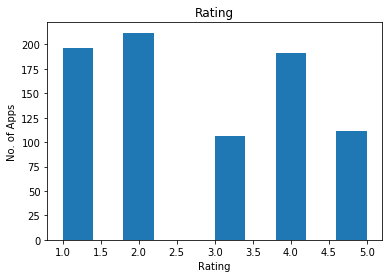

In [5]:
# No. installs

plt.hist(rq1['install_category'])
plt.title('Rating')
plt.xlabel('Rating')
plt.ylabel('No. of Apps')

Text(0, 0.5, 'No. of Apps')

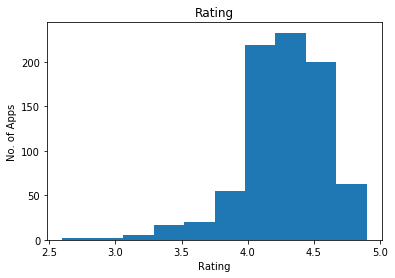

In [6]:
# Ratings

plt.hist(rq1['Rating'])
plt.title('Rating')
plt.xlabel('Rating')
plt.ylabel('No. of Apps')

count    816.00
mean       7.05
std        1.48
min        3.60
25%        5.80
50%        6.80
75%        8.33
max        9.80
Name: score, dtype: float64
Skewness: 0.14


Text(0, 0.5, 'No. of Apps')

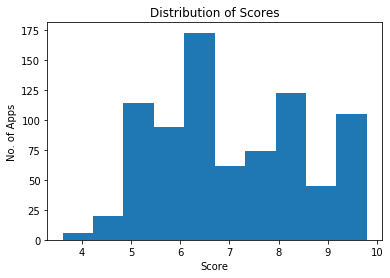

In [7]:
# Scores

print(round(rq1['score'].describe(),2))
print('Skewness:', str(round(rq1['score'].skew(),2)))
plt.hist(rq1['score'])
plt.title('Distribution of Scores')
plt.xlabel('Score')
plt.ylabel('No. of Apps')

Text(0.5, 1.0, 'Distribution of Popular and Non-Popular Apps')

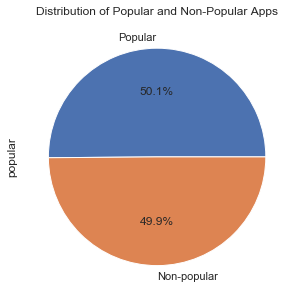

In [8]:
# Popular vs non-popular
sns.set(rc={'figure.figsize':(5,5)})
ax = rq1['popular'].value_counts().plot(kind='pie',labels=['Popular','Non-popular'], autopct="%1.1f%%")
ax.set_title('Distribution of Popular and Non-Popular Apps')

In [9]:
# No. reviews in popular vs non-popular apps
temp = pd.DataFrame(round(rq1.groupby(['popular'], as_index=False)['Reviews'].mean(),0))
temp = temp.rename({'Reviews':'No. Reviews','popular':'Popular'}, axis=1)
temp['Group'] = ['Not Popular','Popular']
temp.drop('Popular', inplace=True, axis=1)
temp[['Group','No. Reviews']]

Group  No. Reviews
0  Not Popular      17448.0
1      Popular    1401943.0

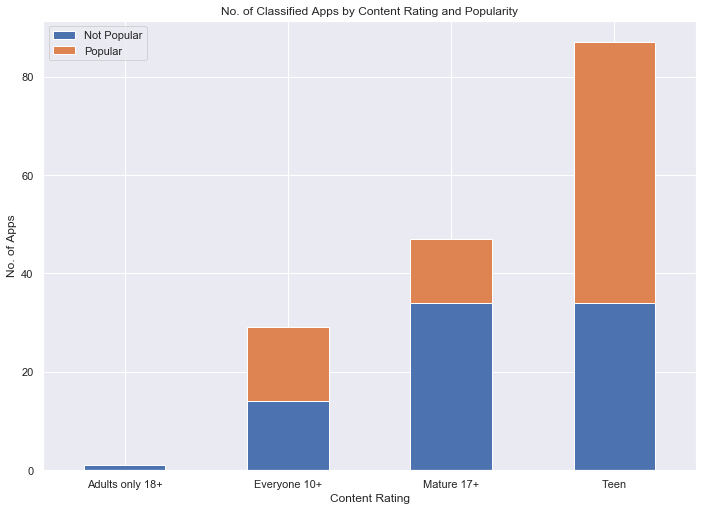

In [10]:
# Distribution of content ratings
sns.set(rc={'figure.figsize':(11.7,8.27)})
agg_tips = rq1[rq1['Content Rating'] != 'Everyone'].groupby(['Content Rating','popular'])['App'].count().unstack()
ax = agg_tips.plot(kind='bar', stacked=True)

# Just add a title and rotate the x-axis labels to be horizontal.
plt.title('No. of Classified Apps by Content Rating and Popularity')
plt.xticks(rotation=0, ha='center')
plt.ylabel('No. of Apps')
ax.legend(labels=['Not Popular','Popular'])

In [11]:
pd.crosstab(rq1['Content Rating'], rq1['popular'],margins=True)

popular            0    1  All
Content Rating                
Adults only 18+    1    0    1
Everyone         324  328  652
Everyone 10+      14   15   29
Mature 17+        34   13   47
Teen              34   53   87
All              407  409  816

In [12]:
# Update frequency
temp = pd.DataFrame(rq1.groupby(['popular'], as_index=False)['num_days_before_latest_update'].max()).merge(pd.DataFrame(round(rq1.groupby(['popular'], as_index=False)['num_days_before_latest_update'].mean(),2)), on='popular')
temp = temp.rename({'num_days_before_latest_update_x':'Maximum','num_days_before_latest_update_y':'Average','popular':'Popular'}, axis=1)
temp['Group'] = ['Not Popular','Popular']
temp.drop('Popular', inplace=True, axis=1)
temp[['Group','Average','Maximum']]

Group  Average  Maximum
0  Not Popular   179.12     2595
1      Popular   106.81     2393

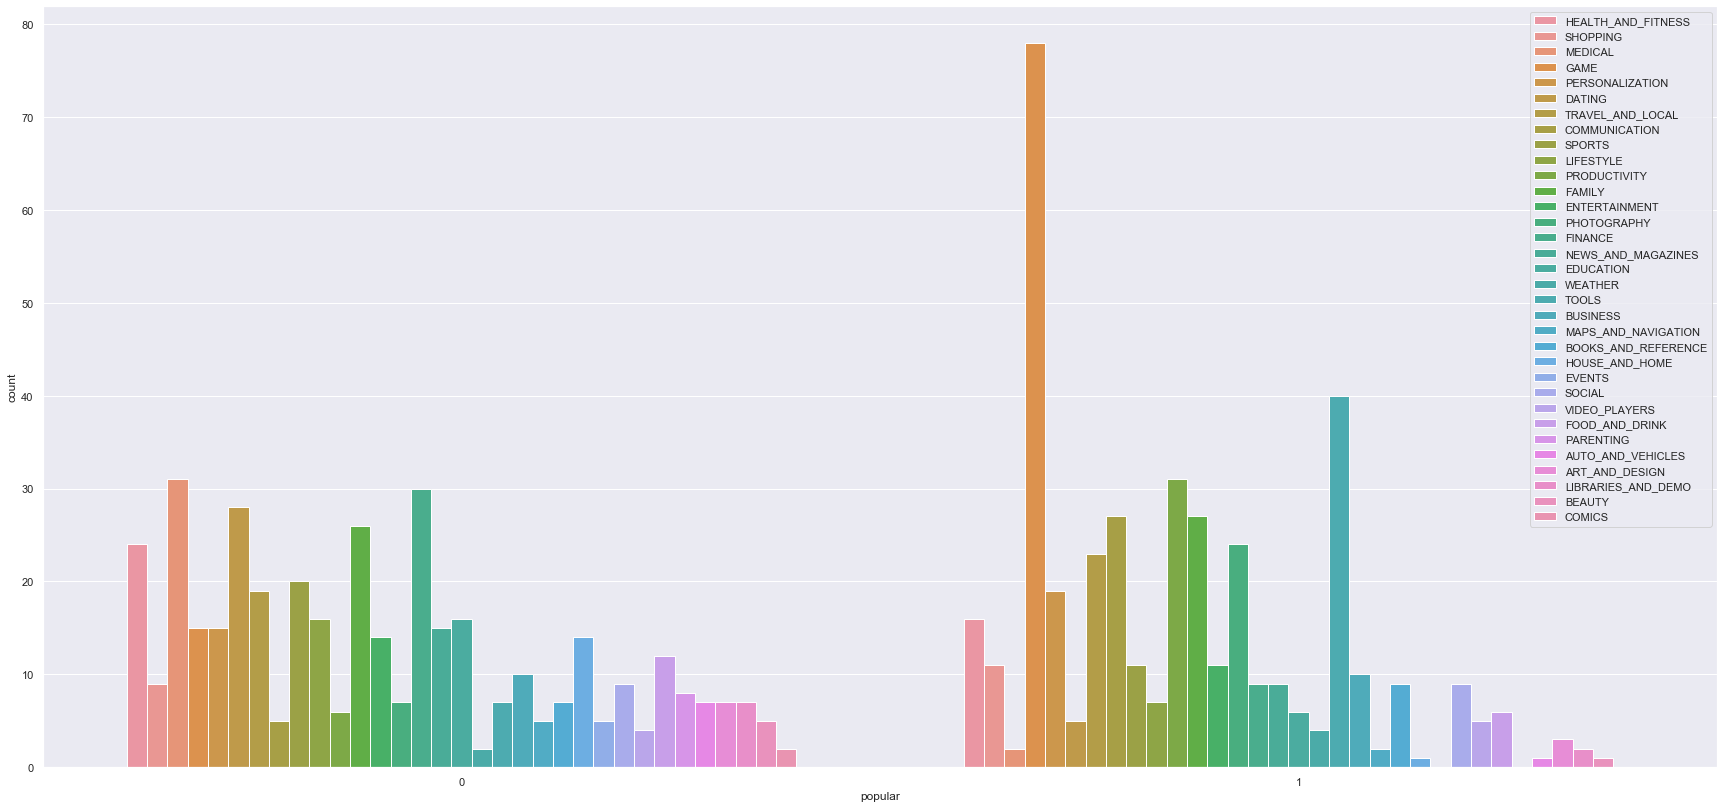

In [13]:
# Top categories
sns.set(rc={'figure.figsize':(30,14)})
ax = sns.countplot(x='popular', hue='Category', data = rq1)
ax.legend(loc='upper right')

In [14]:
# Top categories
temp_all = pd.DataFrame(rq1.groupby(['popular','Category'])['App'].count())
{k: v for k, v in sorted(dict(rq1.groupby(['popular','Category'])['App'].count()).items(), key=lambda item: item[1])}

{(1, 'AUTO_AND_VEHICLES'): 1,
 (1, 'BEAUTY'): 1,
 (1, 'HOUSE_AND_HOME'): 1,
 (0, 'COMICS'): 2,
 (0, 'WEATHER'): 2,
 (1, 'LIBRARIES_AND_DEMO'): 2,
 (1, 'MAPS_AND_NAVIGATION'): 2,
 (1, 'MEDICAL'): 2,
 (1, 'ART_AND_DESIGN'): 3,
 (0, 'VIDEO_PLAYERS'): 4,
 (1, 'WEATHER'): 4,
 (0, 'BEAUTY'): 5,
 (0, 'COMMUNICATION'): 5,
 (0, 'EVENTS'): 5,
 (0, 'MAPS_AND_NAVIGATION'): 5,
 (1, 'DATING'): 5,
 (1, 'VIDEO_PLAYERS'): 5,
 (0, 'PRODUCTIVITY'): 6,
 (1, 'EDUCATION'): 6,
 (1, 'FOOD_AND_DRINK'): 6,
 (0, 'ART_AND_DESIGN'): 7,
 (0, 'AUTO_AND_VEHICLES'): 7,
 (0, 'BOOKS_AND_REFERENCE'): 7,
 (0, 'LIBRARIES_AND_DEMO'): 7,
 (0, 'PHOTOGRAPHY'): 7,
 (0, 'TOOLS'): 7,
 (1, 'LIFESTYLE'): 7,
 (0, 'PARENTING'): 8,
 (0, 'SHOPPING'): 9,
 (0, 'SOCIAL'): 9,
 (1, 'BOOKS_AND_REFERENCE'): 9,
 (1, 'FINANCE'): 9,
 (1, 'NEWS_AND_MAGAZINES'): 9,
 (1, 'SOCIAL'): 9,
 (0, 'BUSINESS'): 10,
 (1, 'BUSINESS'): 10,
 (1, 'ENTERTAINMENT'): 11,
 (1, 'SHOPPING'): 11,
 (1, 'SPORTS'): 11,
 (0, 'FOOD_AND_DRINK'): 12,
 (0, 'ENTERTAINMENT'): 14

In [15]:
# Top genres
temp_all = pd.DataFrame(rq1.groupby(['popular','Genres'])['App'].count())
{k: v for k, v in sorted(dict(rq1.groupby(['popular','Genres'])['App'].count()).items(), key=lambda item: item[1])}

{(0, 'Adventure'): 1,
 (0, 'Art & Design;Creativity'): 1,
 (0, 'Art & Design;Pretend Play'): 1,
 (0, 'Casual;Action & Adventure'): 1,
 (0, 'Casual;Pretend Play'): 1,
 (0, 'Education;Pretend Play'): 1,
 (0, 'Educational;Pretend Play'): 1,
 (0, 'Parenting;Education'): 1,
 (0, 'Puzzle'): 1,
 (0, 'Racing;Action & Adventure'): 1,
 (0, 'Role Playing;Pretend Play'): 1,
 (0, 'Simulation;Education'): 1,
 (0, 'Simulation;Pretend Play'): 1,
 (0, 'Sports;Action & Adventure'): 1,
 (0, 'Travel & Local;Action & Adventure'): 1,
 (1, 'Adventure'): 1,
 (1, 'Auto & Vehicles'): 1,
 (1, 'Beauty'): 1,
 (1, 'Casual;Brain Games'): 1,
 (1, 'Educational;Brain Games'): 1,
 (1, 'Educational;Creativity'): 1,
 (1, 'Entertainment;Music & Video'): 1,
 (1, 'House & Home'): 1,
 (1, 'Puzzle;Action & Adventure'): 1,
 (1, 'Role Playing;Action & Adventure'): 1,
 (0, 'Board'): 2,
 (0, 'Casual'): 2,
 (0, 'Comics'): 2,
 (0, 'Strategy'): 2,
 (0, 'Weather'): 2,
 (1, 'Action;Action & Adventure'): 2,
 (1, 'Casual;Pretend Play'): 

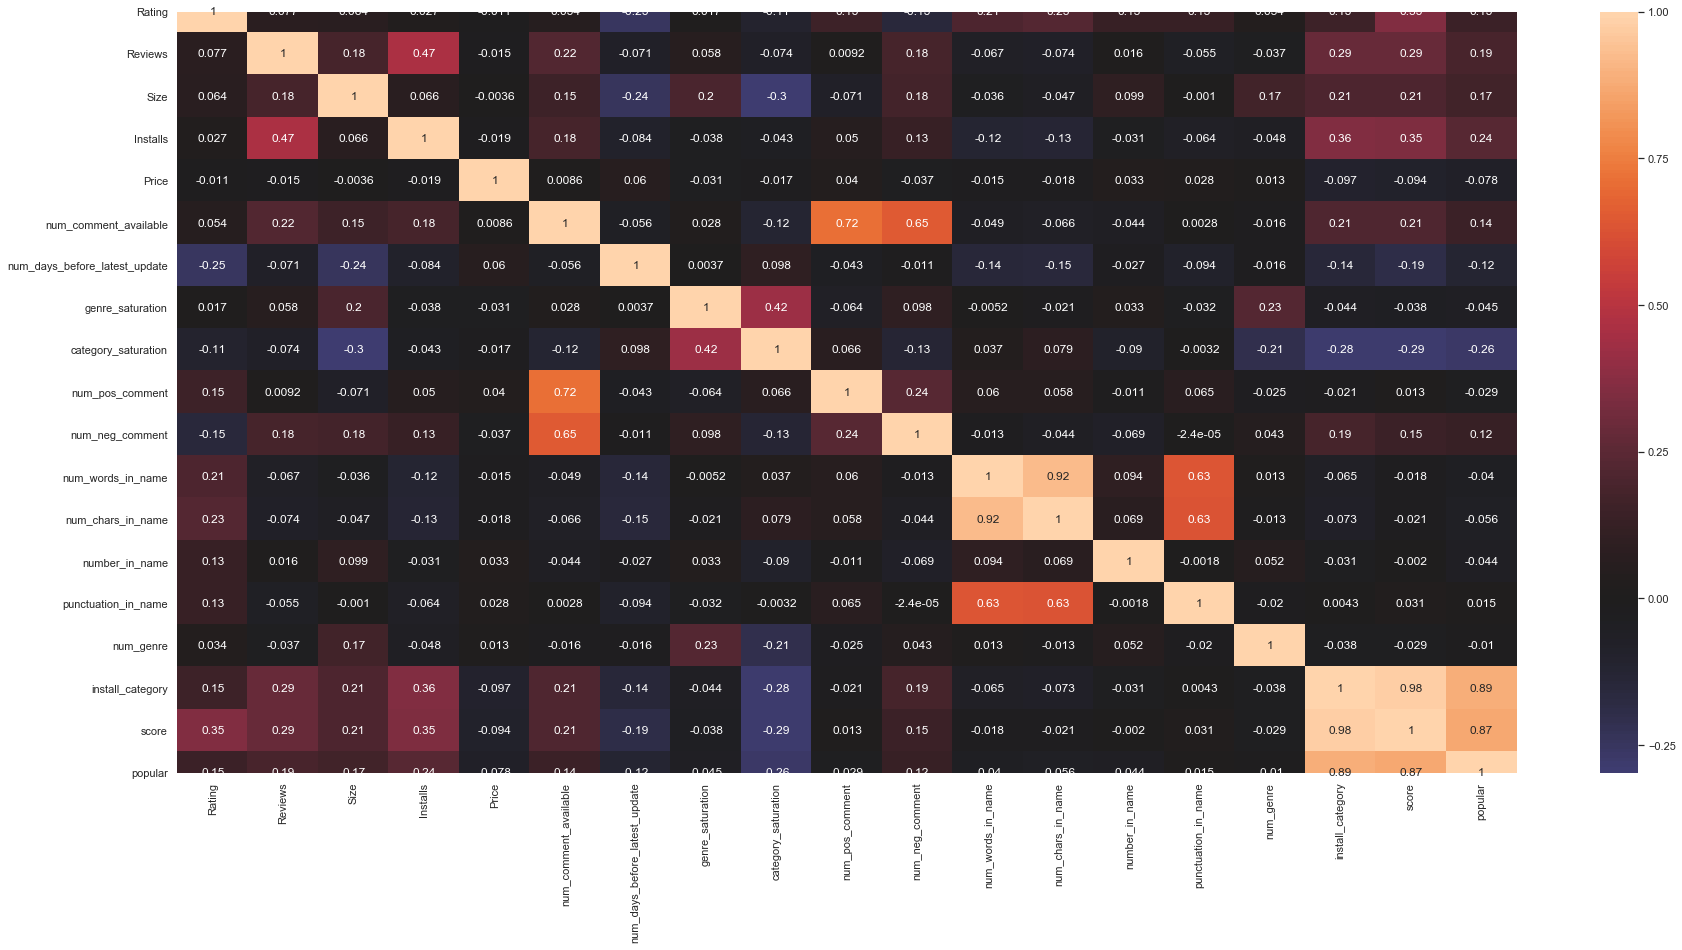

In [16]:
# Correlation
sns.heatmap(rq1.corr(), center=0, annot=True)

# RQ2 Dataset

In [17]:
rq2 = pd.read_csv('rq2_dataset.csv')
rq2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35929 entries, 0 to 35928
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     35929 non-null  object 
 1   popular                 35929 non-null  int64  
 2   Translated_Review       35929 non-null  object 
 3   Sentiment               35929 non-null  object 
 4   Sentiment_Polarity      35929 non-null  float64
 5   Sentiment_Subjectivity  35929 non-null  float64
 6   sentiment_text          35929 non-null  object 
 7   subjectivity_text       35929 non-null  object 
 8   processed_reviews       35865 non-null  object 
dtypes: float64(2), int64(1), object(6)
memory usage: 2.5+ MB


In [18]:
rq2.head()

App  popular  \
0  10 Best Foods for You        0   
1  10 Best Foods for You        0   
2  10 Best Foods for You        0   
3  10 Best Foods for You        0   
4  10 Best Foods for You        0   

                                   Translated_Review Sentiment  \
0  I like eat delicious food. That's I'm cooking ...  Positive   
1    This help eating healthy exercise regular basis  Positive   
2         Works great especially going grocery store  Positive   
3                                       Best idea us  Positive   
4                                           Best way  Positive   

   Sentiment_Polarity  Sentiment_Subjectivity sentiment_text  \
0                1.00                0.533333       Positive   
1                0.25                0.288462        Neutral   
2                0.40                0.875000       Positive   
3                1.00                0.300000       Positive   
4                1.00                0.300000       Positive   

  subjectivity_text                                  processed_reviews  
0        Subjective  like eat delicious food thats im cooking food ...  
1         Objective         help eating healthy exercise regular basis  
2        Subjective          work great especially going grocery store  
3         Objective                                        best idea u  
4         Objective                                           best way

In [19]:
rq2.describe(include='all').T.round(2)

count unique         top   freq      mean       std  \
App                     35929    816  Bowmasters    312       NaN       NaN   
popular                 35929    NaN         NaN    NaN  0.561858  0.496166   
Translated_Review       35929  26682        Good    228       NaN       NaN   
Sentiment               35929      3    Positive  23073       NaN       NaN   
Sentiment_Polarity      35929    NaN         NaN    NaN  0.180904   0.35008   
Sentiment_Subjectivity  35929    NaN         NaN    NaN  0.493767  0.258053   
sentiment_text          35929      3     Neutral  19092       NaN       NaN   
subjectivity_text       35929      2  Subjective  18542       NaN       NaN   
processed_reviews       35865  25827        good    465       NaN       NaN   

                        min       25%       50%   75%  max  
App                     NaN       NaN       NaN   NaN  NaN  
popular                   0         0         1     1    1  
Translated_Review       NaN       NaN       NaN   NaN  NaN  
Sentiment               NaN       NaN       NaN   NaN  NaN  
Sentiment_Polarity       -1         0      0.15   0.4    1  
Sentiment_Subjectivity    0  0.361111  0.514835  0.65    1  
sentiment_text          NaN       NaN       NaN   NaN  NaN  
subjectivity_text       NaN       NaN       NaN   NaN  NaN  
processed_reviews       NaN       NaN       NaN   NaN  NaN

In [20]:
# Average polarity and subjectivity based on app popularity and reviews sentiment
rq2.groupby(['popular','sentiment_text']).mean()

Sentiment_Polarity  Sentiment_Subjectivity
popular sentiment_text                                            
0       Negative                 -0.532644                0.668050
        Neutral                   0.038340                0.332360
        Positive                  0.536783                0.634409
1       Negative                 -0.477075                0.620424
        Neutral                   0.032854                0.404544
        Positive                  0.512192                0.612828

In [21]:
# No. reviews in each category
rq2.groupby(['popular','sentiment_text'])['App'].count()

popular  sentiment_text
0        Negative           1214
         Neutral            7410
         Positive           7118
1        Negative           1717
         Neutral           11682
         Positive           6788
Name: App, dtype: int64

In [22]:
# No. apps in each category (has overlapping apps in each category)
rq2.groupby(['popular','sentiment_text'])['App'].nunique()

popular  sentiment_text
0        Negative          283
         Neutral           399
         Positive          401
1        Negative          323
         Neutral           395
         Positive          391
Name: App, dtype: int64

       popular  Sentiment_Polarity  Sentiment_Subjectivity
count   6788.0         6788.000000             6788.000000
mean       1.0            0.512192                0.612828
std        0.0            0.203527                0.190635
min        1.0            0.250000                0.000000
25%        1.0            0.350000                0.500000
50%        1.0            0.480000                0.600000
75%        1.0            0.625000                0.742857
max        1.0            1.000000                1.000000


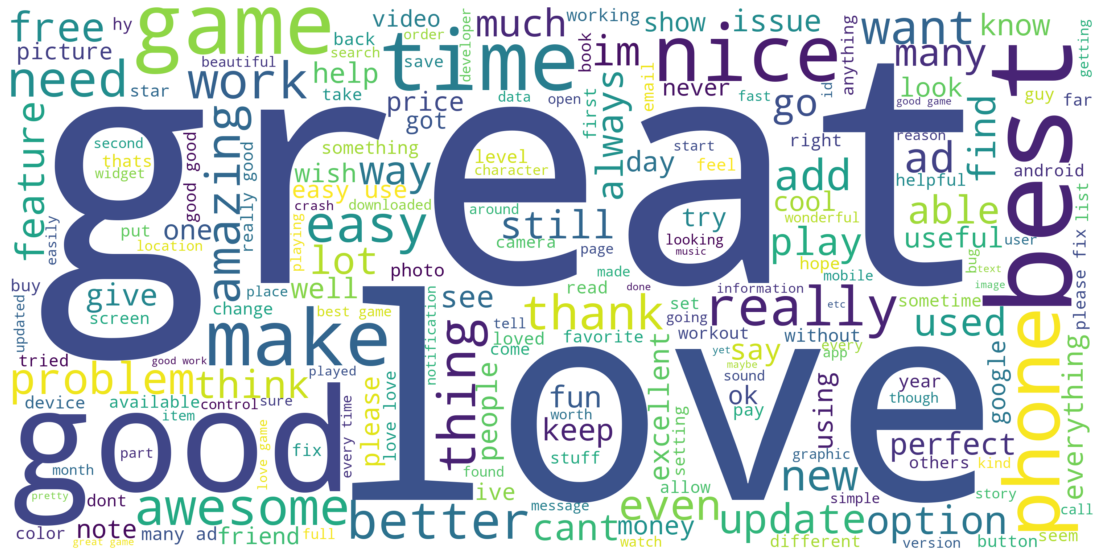

In [23]:
positive_popular = rq2[(rq2['popular'] == 1) & (rq2['sentiment_text'] == 'Positive')]
print(positive_popular.describe())

text_joined = " ".join(str(one_row) for one_row in positive_popular['processed_reviews'])
wordcloud = WordCloud(stopwords=STOPWORDS, background_color="white", width=3000, height=1500).generate(text_joined)
plt.figure (figsize = (20,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

       popular  Sentiment_Polarity  Sentiment_Subjectivity
count   7118.0         7118.000000             7118.000000
mean       0.0            0.536783                0.634409
std        0.0            0.203315                0.192400
min        0.0            0.250000                0.000000
25%        0.0            0.375000                0.514464
50%        0.0            0.500000                0.600000
75%        0.0            0.700000                0.750000
max        0.0            1.000000                1.000000


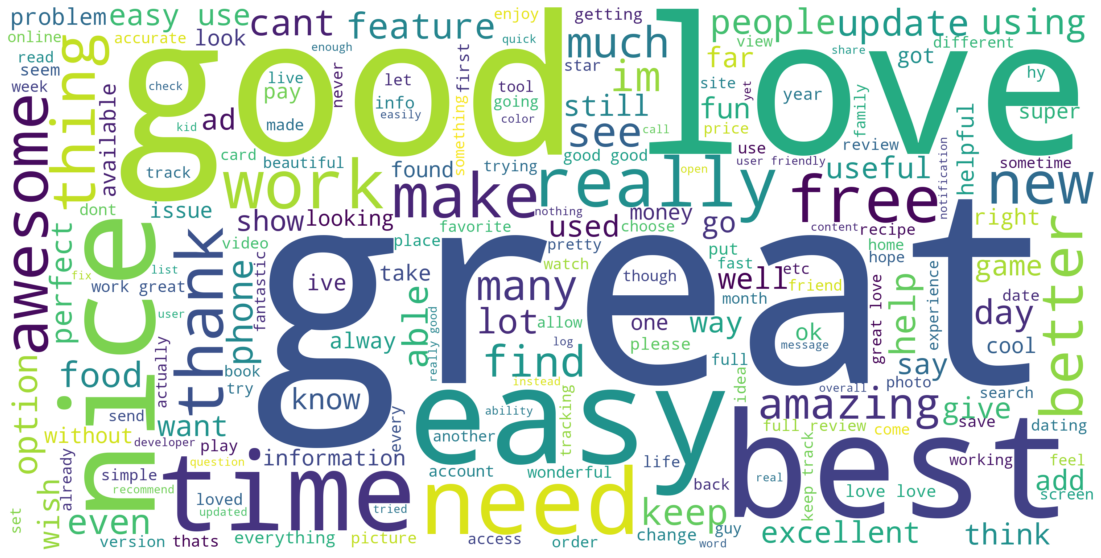

In [24]:
positive_non_popular = rq2[(rq2['popular'] == 0) & (rq2['sentiment_text'] == 'Positive')]
print(positive_non_popular.describe())

text_joined = " ".join(str(one_row) for one_row in positive_non_popular['processed_reviews'])
wordcloud = WordCloud(stopwords=STOPWORDS, background_color="white", width=3000, height=1500).generate(text_joined)
plt.figure (figsize = (20,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

       popular  Sentiment_Polarity  Sentiment_Subjectivity
count   1717.0         1717.000000             1717.000000
mean       1.0           -0.477075                0.620424
std        0.0            0.203317                0.213258
min        1.0           -1.000000                0.050000
25%        1.0           -0.541667                0.453846
50%        1.0           -0.400000                0.600000
75%        1.0           -0.319792                0.750000
max        1.0           -0.250595                1.000000


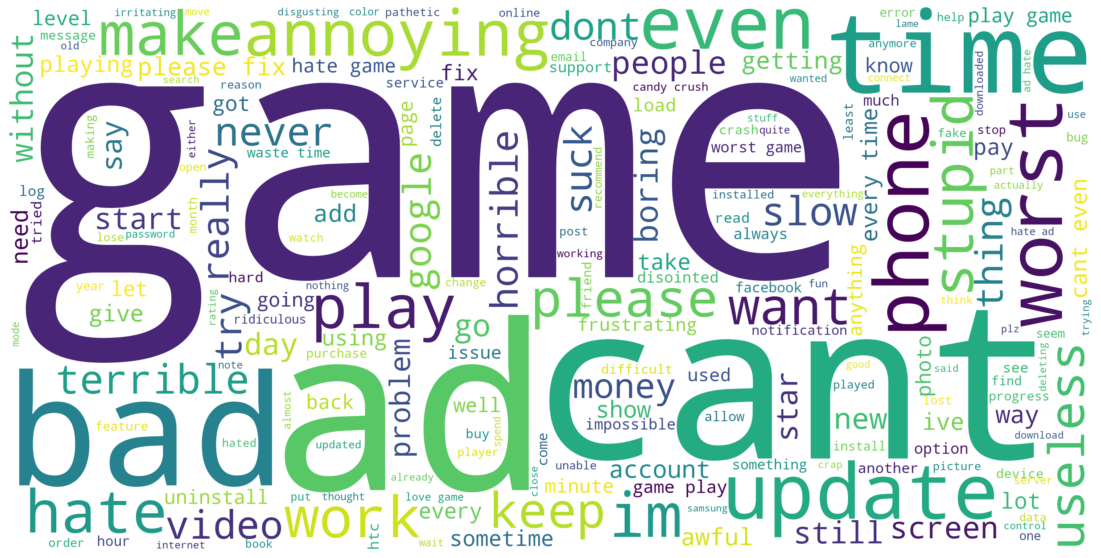

In [25]:
negative_popular = rq2[(rq2['popular'] == 1) & (rq2['sentiment_text'] == 'Negative')]
print(negative_popular.describe())

text_joined = " ".join(str(one_row) for one_row in negative_popular['processed_reviews'])
wordcloud = WordCloud(stopwords=STOPWORDS, background_color="white", width=3000, height=1500).generate(text_joined)
plt.figure (figsize = (20,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

       popular  Sentiment_Polarity  Sentiment_Subjectivity
count   1214.0         1214.000000             1214.000000
mean       0.0           -0.532644                0.668050
std        0.0            0.227408                0.236161
min        0.0           -1.000000                0.088889
25%        0.0           -0.700000                0.500000
50%        0.0           -0.500000                0.666667
75%        0.0           -0.350000                0.900000
max        0.0           -0.250794                1.000000


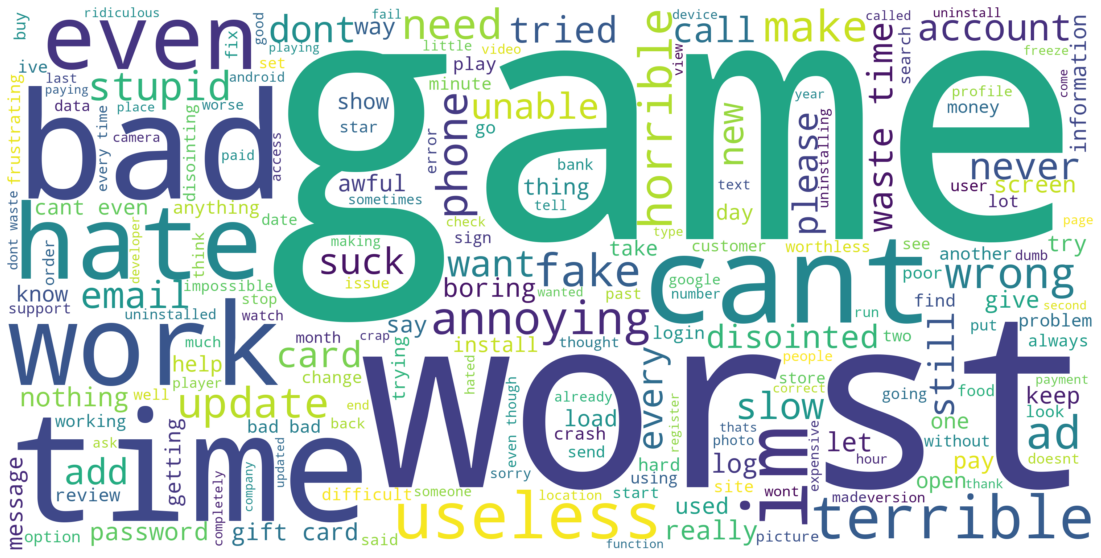

In [26]:
negative_non_popular = rq2[(rq2['popular'] == 0) & (rq2['sentiment_text'] == 'Negative')]
print(negative_non_popular.describe())

text_joined = " ".join(str(one_row) for one_row in negative_non_popular['processed_reviews'])
wordcloud = WordCloud(stopwords=STOPWORDS, background_color="white", width=3000, height=1500).generate(text_joined)
plt.figure (figsize = (20,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

       popular  Sentiment_Polarity  Sentiment_Subjectivity
count  11682.0        11682.000000            11682.000000
mean       1.0            0.032854                0.404544
std        0.0            0.122981                0.229890
min        1.0           -0.250000                0.000000
25%        1.0           -0.033333                0.287500
50%        1.0            0.002500                0.450703
75%        1.0            0.133333                0.556460
max        1.0            0.250000                1.000000


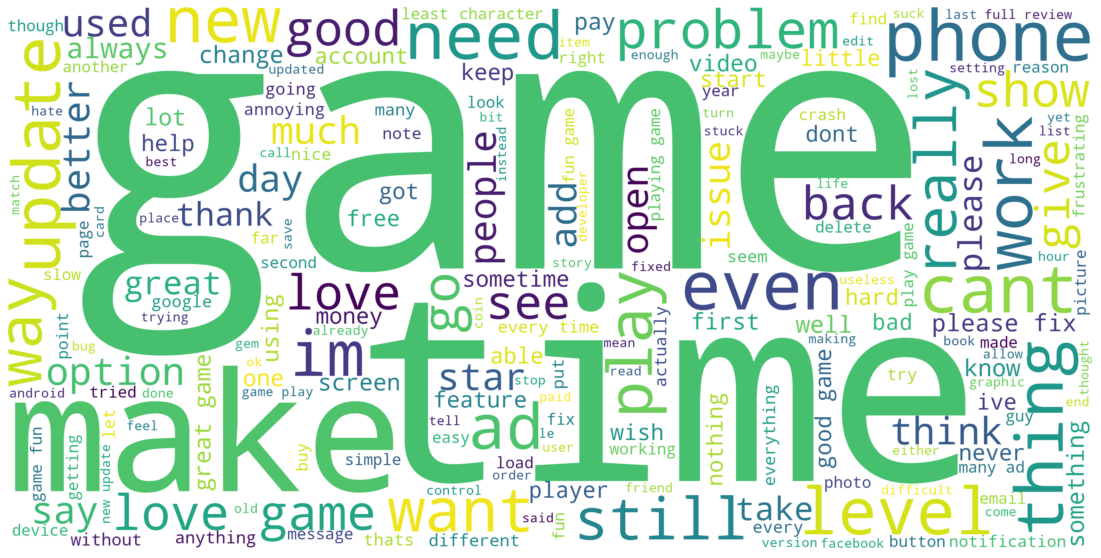

In [27]:
neutral_popular = rq2[(rq2['popular'] == 1) & (rq2['sentiment_text'] == 'Neutral')]
print(neutral_popular.describe())

text_joined = " ".join(str(one_row) for one_row in neutral_popular['processed_reviews'])
wordcloud = WordCloud(stopwords=STOPWORDS, background_color="white", width=3000, height=1500).generate(text_joined)
plt.figure (figsize = (20,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

       popular  Sentiment_Polarity  Sentiment_Subjectivity
count   7410.0         7410.000000             7410.000000
mean       0.0            0.038340                0.332360
std        0.0            0.117851                0.267930
min        0.0           -0.250000                0.000000
25%        0.0            0.000000                0.000000
50%        0.0            0.000000                0.366071
75%        0.0            0.135938                0.527927
max        0.0            0.250000                1.000000


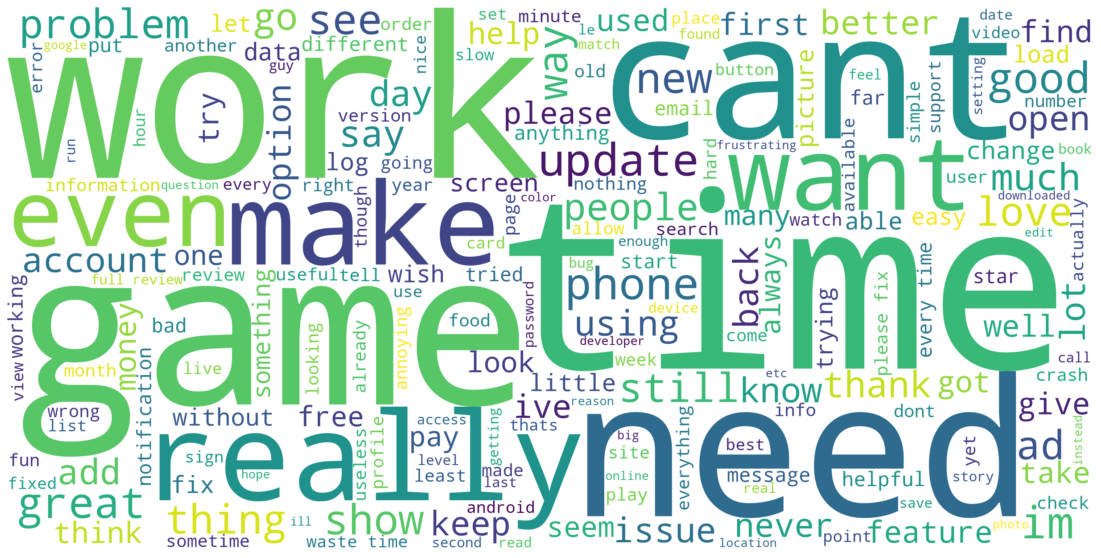

In [28]:
neutral_non_popular = rq2[(rq2['popular'] == 0) & (rq2['sentiment_text'] == 'Neutral')]
print(neutral_non_popular.describe())

text_joined = " ".join(str(one_row) for one_row in neutral_non_popular['processed_reviews'])
wordcloud = WordCloud(stopwords=STOPWORDS, background_color="white", width=3000, height=1500).generate(text_joined)
plt.figure (figsize = (20,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()